# Mouse Blood Hematopoiesis + Basic Plot
*Note: The results presented are derived from real data with cell-type annotations, utilizing components of Velocity, Growth, and Score.*

In [5]:
import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
import os
import CytoBridge as cb

## **1. Load Trained Data and Model**
- Load the trained data from the specified H5AD file and load the associated model.

In [6]:
save_path = "/home/sjt/workspace2/CytoBridge_test-main_crufm/results/results_cluster/adata.h5ad"      
exp_name      = os.path.basename(os.path.dirname(save_path))      # -> results_unscore
base_fig_dir  = "/home/sjt/workspace2/CytoBridge_test-main_crufm/figures"
output_path   = os.path.join(base_fig_dir, exp_name)
os.makedirs(output_path, exist_ok=True)


adata  = sc.read_h5ad(save_path)
model  = cb.utils.load_model_from_adata(adata)
device = "cuda"
print(adata)

Reconstructing model...
Model loaded successfully.
AnnData object with n_obs × n_vars = 49116 × 40
    obs: 'samples', 'cluster', 'time_point_processed', 'velocity_self_transition', 'time_categorical'
    uns: 'all_model', 'neighbors', 'time_categorical_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_latent', 'X_umap', 'growth_rate', 'score_latent', 'velocity_latent', 'velocity_umap'
    layers: 'Ms', 'velocity', 'velocity_latent'
    obsp: 'connectivities', 'distances'


## **2.Dissecting Learned Dynamics on Observed Data**

- ### **2.1 Plot Velocity stream**  
  &nbsp;&nbsp;If the model includes velocity components, plot the velocity stream. (intrinsic velocity)

computing velocity graph (using 16/64 cores)


  0%|          | 0/49116 [00:00<?, ?cells/s]

    finished (0:00:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_Velocity_Stream_Plot.svg


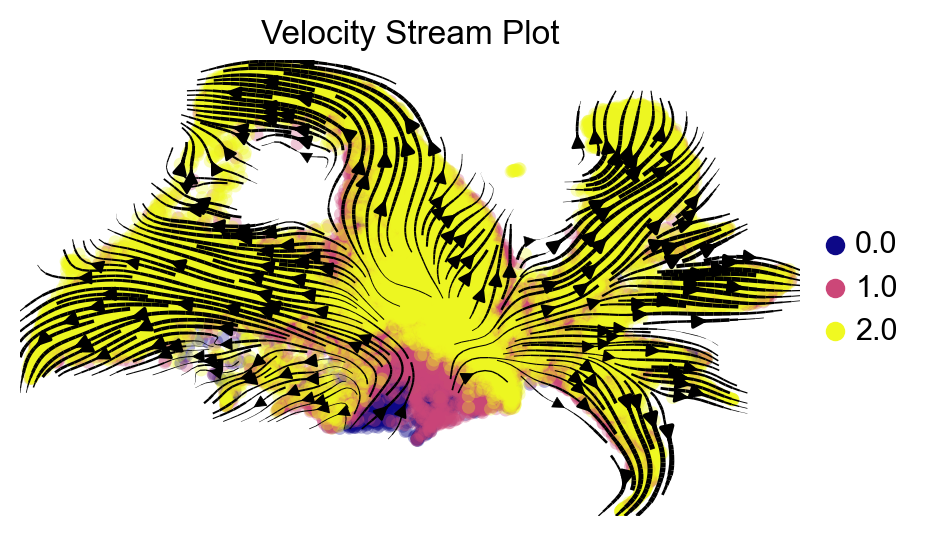

Velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/Velocity_Stream_Plot.svg
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_Velocity_cluster_Stream_Plot.svg


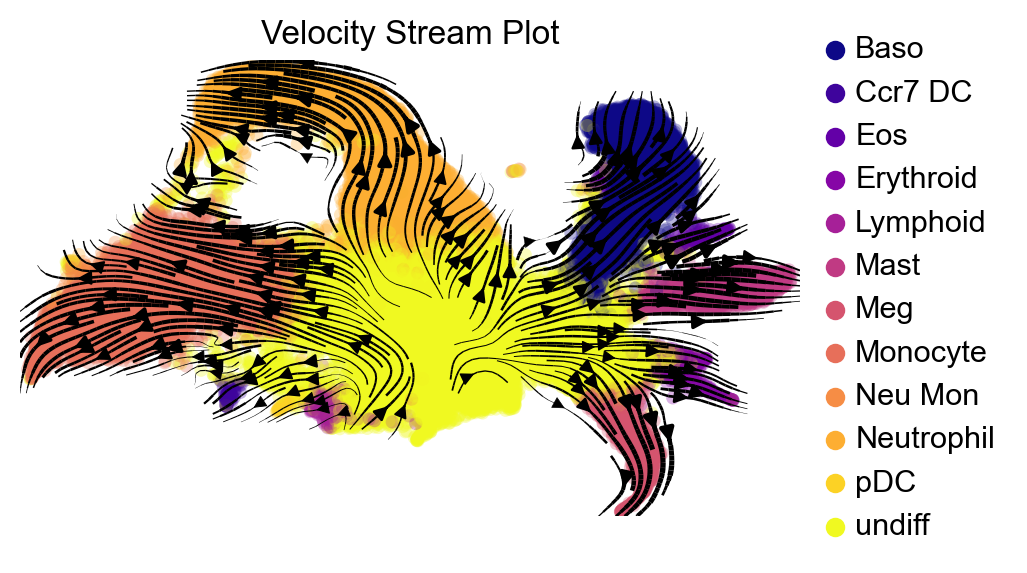

In [3]:
if 'velocity_latent' in adata.obsm:
    adata = cb.pl.plot_velocity_stream(adata, model,output_path, dim_reduction='umap', device='cuda',color_key="cluster")

computing velocity graph (using 16/64 cores)


  0%|          | 0/49116 [00:00<?, ?cells/s]

    finished (0:00:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_Velocity_Stream_Plot.svg


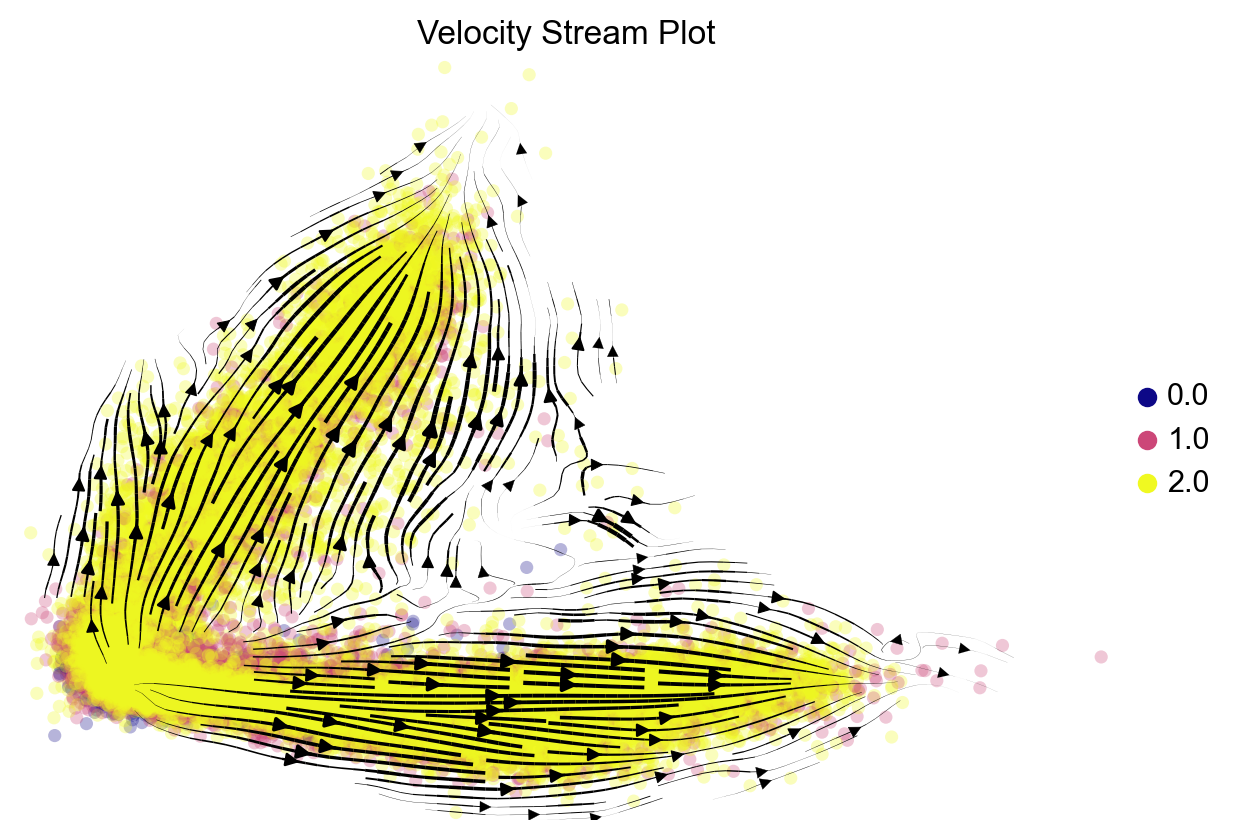

Velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/Velocity_Stream_Plot.svg
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_Velocity_cluster_Stream_Plot.svg


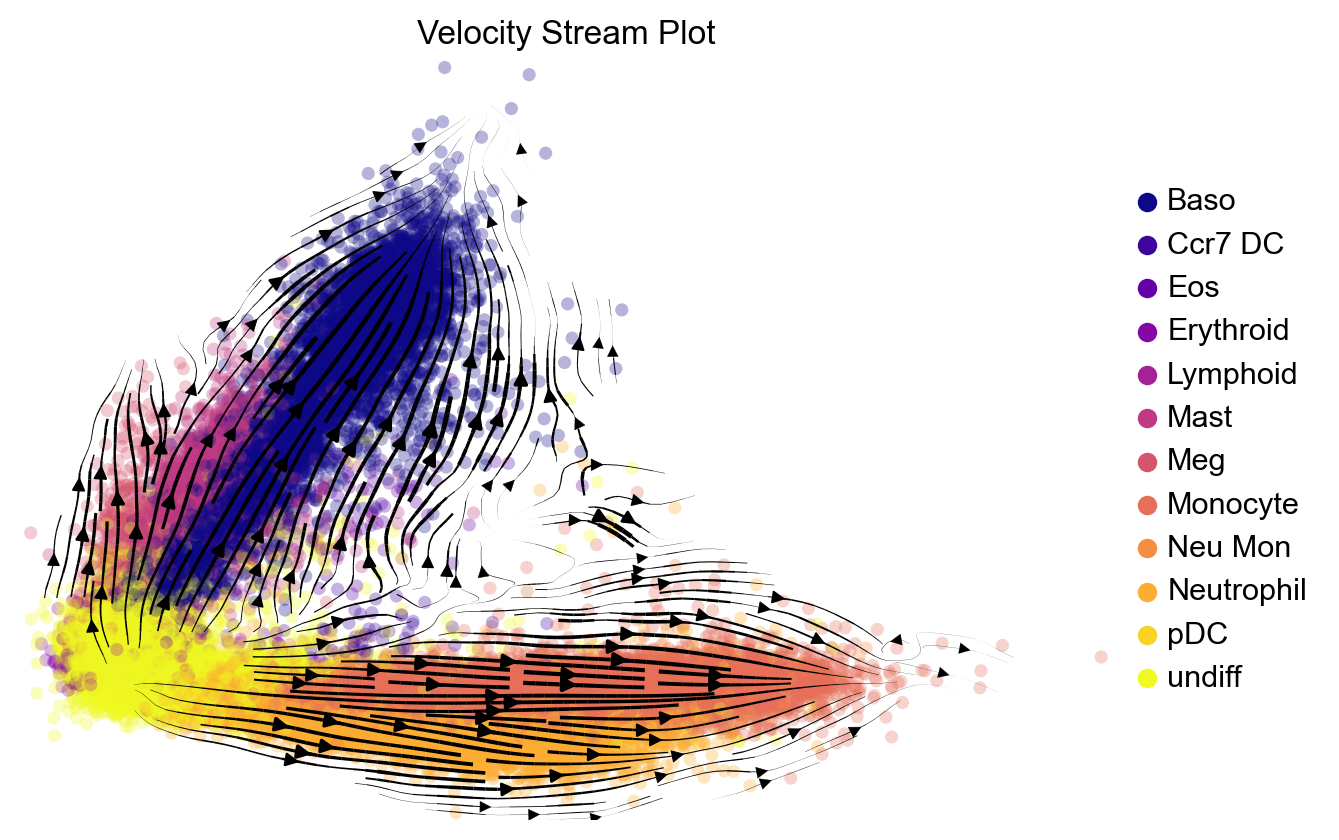

In [7]:
if 'velocity_latent' in adata.obsm:
    adata = cb.pl.plot_velocity_stream(adata, model,output_path, dim_reduction='none', device='cuda',color_key="cluster")

- ### **2.2 Plot Score Velocity**  
  &nbsp;&nbsp;If the model includes Score components, plot the Score velocity stream. (diffusion velocity --- Stochasticity)

saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_Score_Stream_Plot.svg


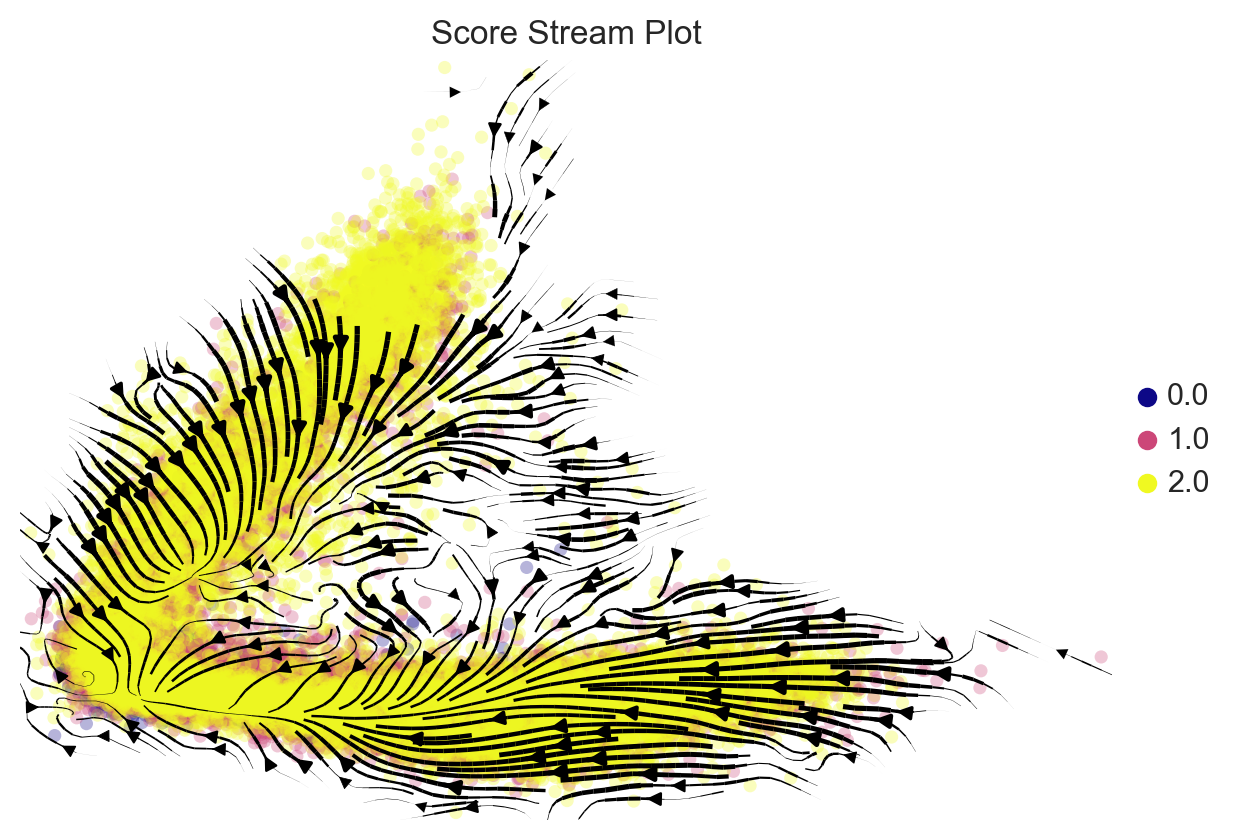

Score function diffusion velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/Score_Stream_Plot.svg


In [17]:
if 'score_latent' in adata.obsm :
    cb.pl.plot_score_stream(adata,model, output_path, dim_reduction='none', device='cuda')

- ### **2.3 Plot All Velocity stream**  
  &nbsp;&nbsp;If the model includes Velocity,Score components, plot All velocity stream.

computing velocity graph (using 16/64 cores)


  0%|          | 0/49116 [00:00<?, ?cells/s]

    finished (0:00:18) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:07) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/scvelo_All_Velocity_Stream.svg


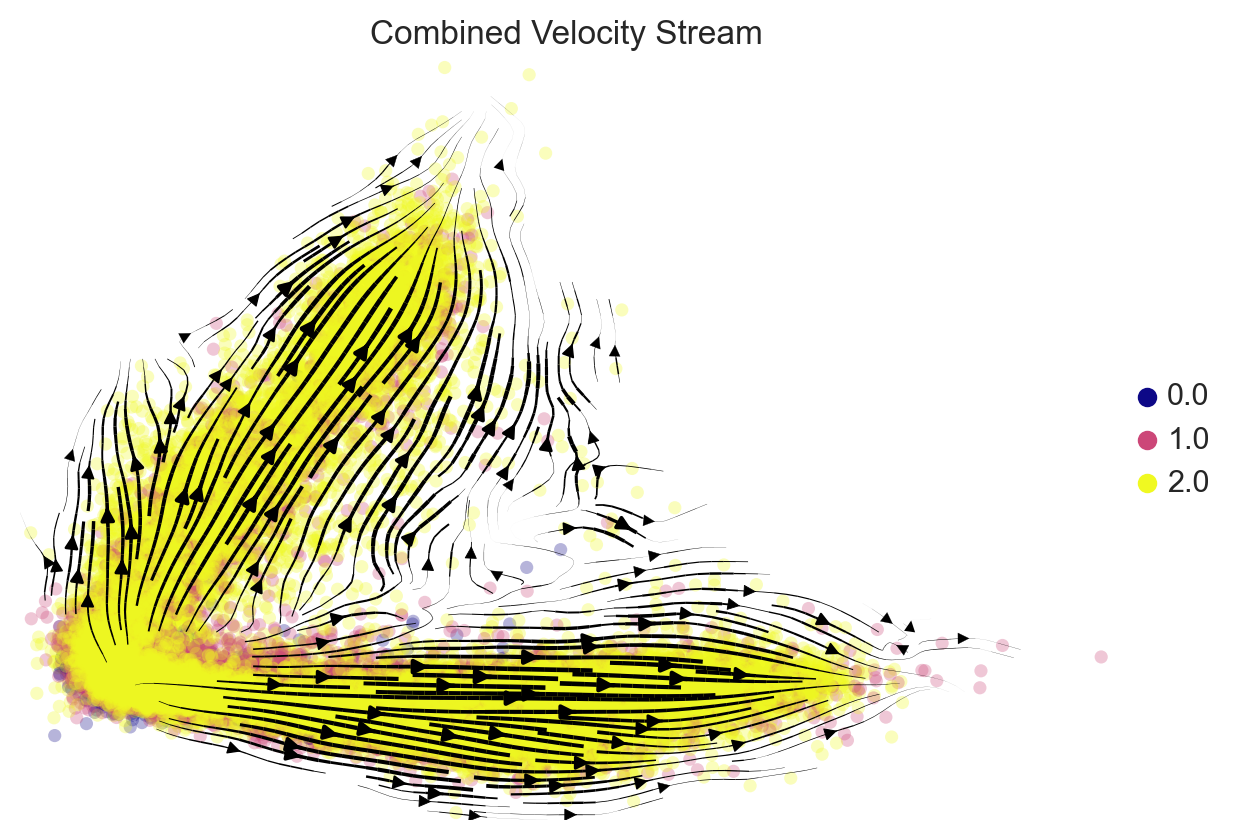

All velocity stream plot saved to: /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/All_Velocity_Stream.svg


In [18]:
if 'score_latent' in adata.obsm and 'velocity_latent' in adata.obsm:
    CytoBridge.pl.plot_combined_velocity_stream(adata,model,output_path,dim_reduction='none',device='cuda')

## **3.Generating Unobserved Cellular Behaviors**

- ### **3.1 Generating Stochastic Trajectories via SDEs and classification**  
  &nbsp;&nbsp;Generate the initial-data dynamics using a stochastic differential equation (SDE) model that incorporates both Velocity components and classify cells according to classifyed_type(cluster).

Loading existing MLP classifier...
Loading SDE data...
Predicting cell types for SDE trajectories...
Visualizing results...


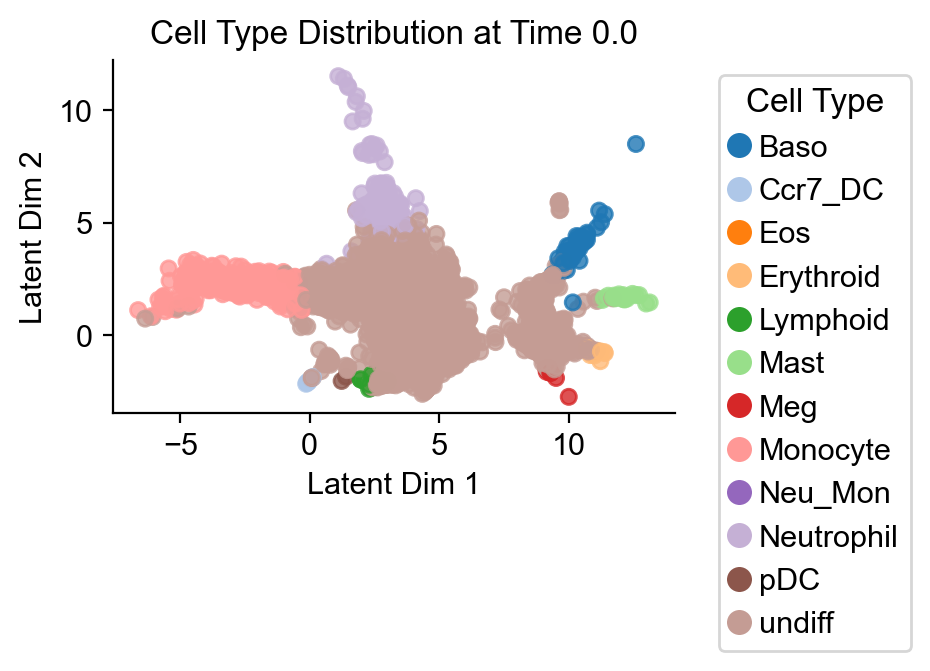

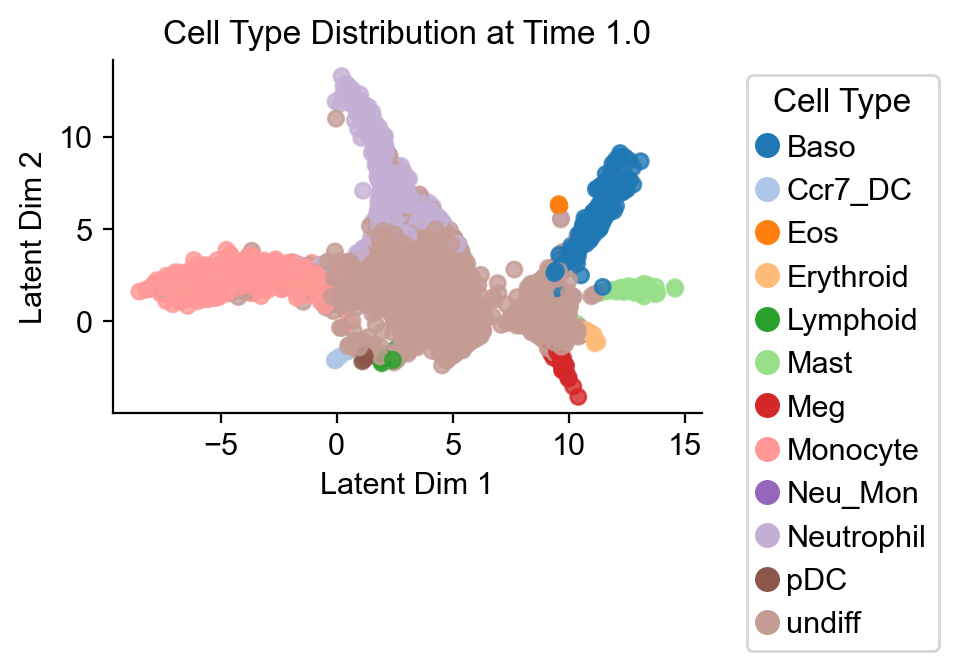

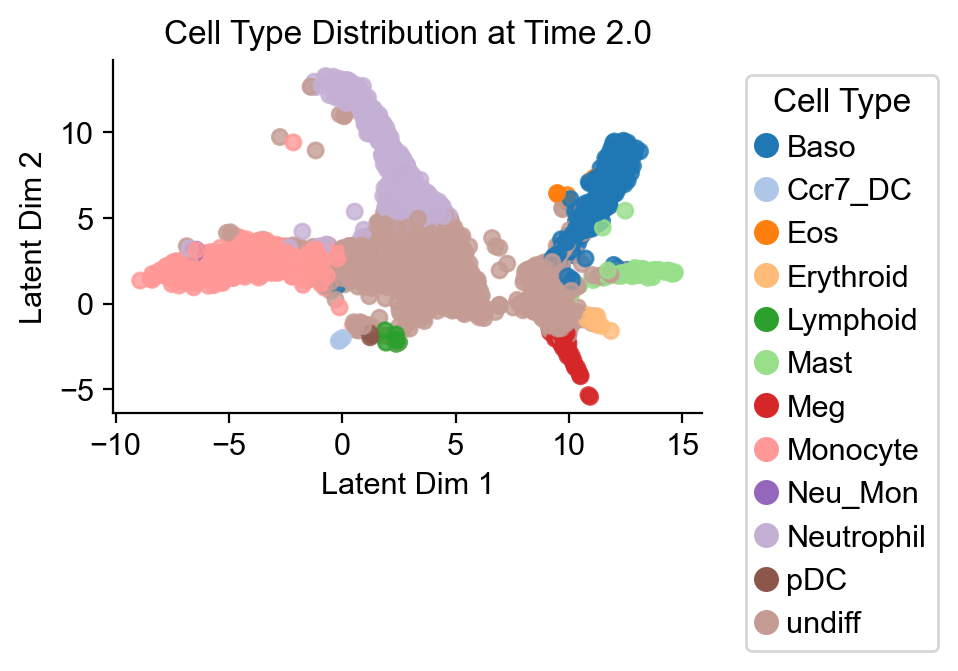

Results saved to /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/sde_results


In [4]:
CytoBridge.pl.process_sde_classification(
    adata,
    model,
    classifyed_type= 'cluster',
    sde_data_path=output_path+'/sde_results',
    output_path = output_path+'/sde_results',
    n_time_steps = 10,
    sample_traj_num = 100,
    dim_reduction="umap",
    hidden_size=128, 
    train_mlp_classifier_epoches=400
    )

- ### **3.2 Plot Terminal States and Analyze Terminal States of Unterminal Cells**  

AnnData object with n_obs × n_vars = 49116 × 40
    obs: 'samples', 'cluster', 'time_point_processed', 'velocity_self_transition', 'time_categorical'
    uns: 'all_model', 'neighbors', 'time_categorical_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_latent', 'X_umap', 'growth_rate', 'score_latent', 'velocity_latent', 'velocity_umap'
    layers: 'Ms', 'velocity', 'velocity_latent'
    obsp: 'connectivities', 'distances'


  0%|          | 0/49116 [00:00<?, ?cell/s]

  0%|          | 0/49116 [00:00<?, ?cell/s]

/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/scatter.py:694: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/utils.py:1396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=bg_size, marker=".", c=bg_color, zorder=zord - 2, **kwargs)
/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/utils.py:1397: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=gp_size, marker=".", c=gp_color, zorder=zord - 1, **kwargs)


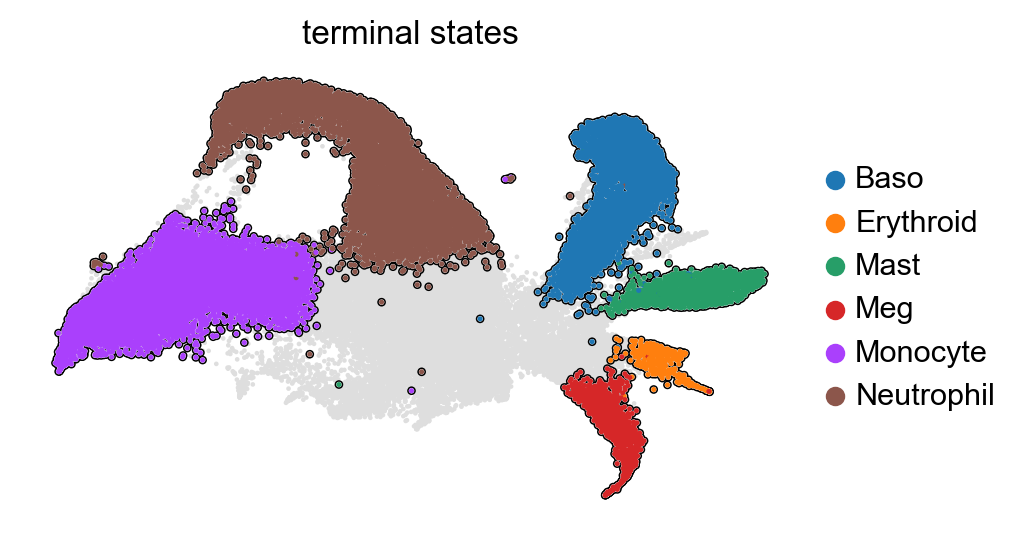

Terminal states analysis is saved to /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster


  0%|          | 0/6 [00:00<?, ?/s]

/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/home/ubuntu/anaconda3/envs/DeepRUOTv2/lib/python3.10/site-packages/scvelo/plotting/scatter.py:656: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


saving figure to file /home/sjt/workspace2/CytoBridge_test-main_crufm/figures/results_cluster/all_fate_probabilities_plot.svg


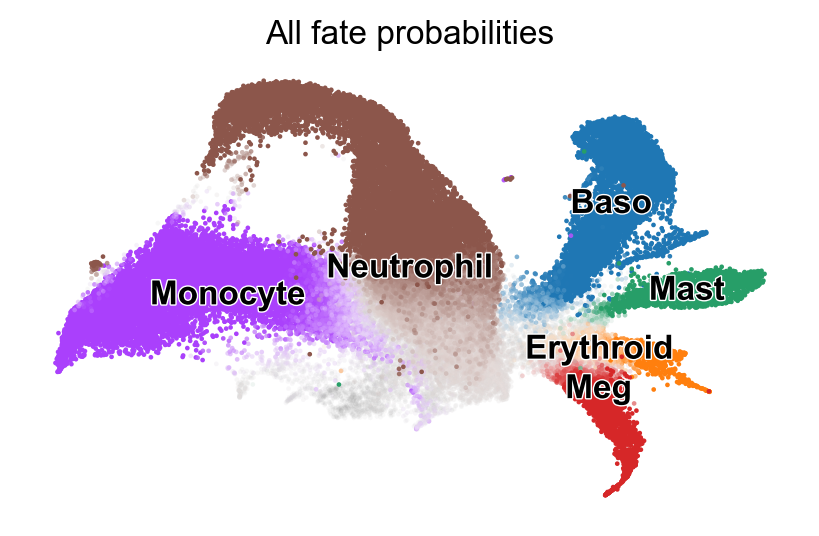

In [5]:
if 'velocity_latent' in adata.obsm:

    print(adata)
    CytoBridge.pl.analyze_terminal_states(adata, classified_type="cluster", terminal_states=["Neutrophil", "Monocyte","Mast","Erythroid","Baso","Meg"], output_path=output_path)
